In [1]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import plotly
import seaborn as sns

In [2]:
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/luissanchezdeleon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/luissanchezdeleon/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/luissanchezdeleon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
pf=pd.read_csv('/Users/luissanchezdeleon/ironhack/Proyecto4/data/df.csv')
pf.head()

,Line number,Character,Place,Time,Line,Word count
0,1,Pumpkin,int. coffee shop,morning,"No, forget it, it's too risky. I'm through doi...",11
1,2,Honey Bunny,int. coffee shop,morning,"You always say that, the same thing every time...",15
2,3,Pumpkin,int. coffee shop,morning,I know that's what I always say. I'm always ri...,12
3,4,Honey Bunny,int. coffee shop,morning,â but you forget about it in a day or two -,10
4,5,Pumpkin,int. coffee shop,morning,"â yeah, well, the days of me forgittin' are ...",18


In [4]:
pf.Line = pf.Line.str.replace(r'[^A-Za-z\s]+', '')


<ipython-input-4-30409a0291cc>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  pf.Line = pf.Line.str.replace(r'[^A-Za-z\s]+', '')


In [5]:
pf.head()

,Line number,Character,Place,Time,Line,Word count
0,1,Pumpkin,int. coffee shop,morning,No forget it its too risky Im through doin tha...,11
1,2,Honey Bunny,int. coffee shop,morning,You always say that the same thing every time ...,15
2,3,Pumpkin,int. coffee shop,morning,I know thats what I always say Im always right...,12
3,4,Honey Bunny,int. coffee shop,morning,but you forget about it in a day or two,10
4,5,Pumpkin,int. coffee shop,morning,yeah well the days of me forgittin are over a...,18


In [6]:
def sentimentAnalysis(sentence):
    sia = SentimentIntensityAnalyzer()
    polarity = sia.polarity_scores(sentence)
    pol = polarity['compound']
    return pol

In [7]:
pf['sentiment_sc'] = pf.Line.apply(sentimentAnalysis)


In [8]:
pf.head(10)

,Line number,Character,Place,Time,Line,Word count,sentiment_sc
0,1,Pumpkin,int. coffee shop,morning,No forget it its too risky Im through doin tha...,11,-0.8176
1,2,Honey Bunny,int. coffee shop,morning,You always say that the same thing every time ...,15,-0.4767
2,3,Pumpkin,int. coffee shop,morning,I know thats what I always say Im always right...,12,0.0000
3,4,Honey Bunny,int. coffee shop,morning,but you forget about it in a day or two,10,-0.3291
4,5,Pumpkin,int. coffee shop,morning,yeah well the days of me forgittin are over a...,18,0.5106
5,6,Honey Bunny,int. coffee shop,morning,When you go on like this you know what you sou...,12,0.6124
6,7,Pumpkin,int. coffee shop,morning,I sound like a sensible fucking man is what I ...,12,0.6124
7,8,Honey Bunny,int. coffee shop,morning,You sound like a duck Quack quack quack quack ...,12,0.3612
8,9,Pumpkin,int. coffee shop,morning,Well take heart cause youre never gonna hafta ...,34,0.2732
9,10,Honey Bunny,int. coffee shop,morning,After tonight,2,0.0000


In [9]:
#we drop outliers (0 sentiment_sc values)

In [10]:
pf = pf[~(pf == 0).any(axis=1)]

In [11]:
len(pf)

680

In [12]:
pf.to_csv('data/pf_s.csv', index=False)
pf.to_json("data/pf_s.json", orient="records")

In [13]:
char_s = pf.groupby(['Character'])['sentiment_sc'].mean().sort_values()
daytime_s = pf.groupby(['Time'])['sentiment_sc'].mean().sort_values()
place = pf.groupby(['Place'])['sentiment_sc'].mean().sort_values()


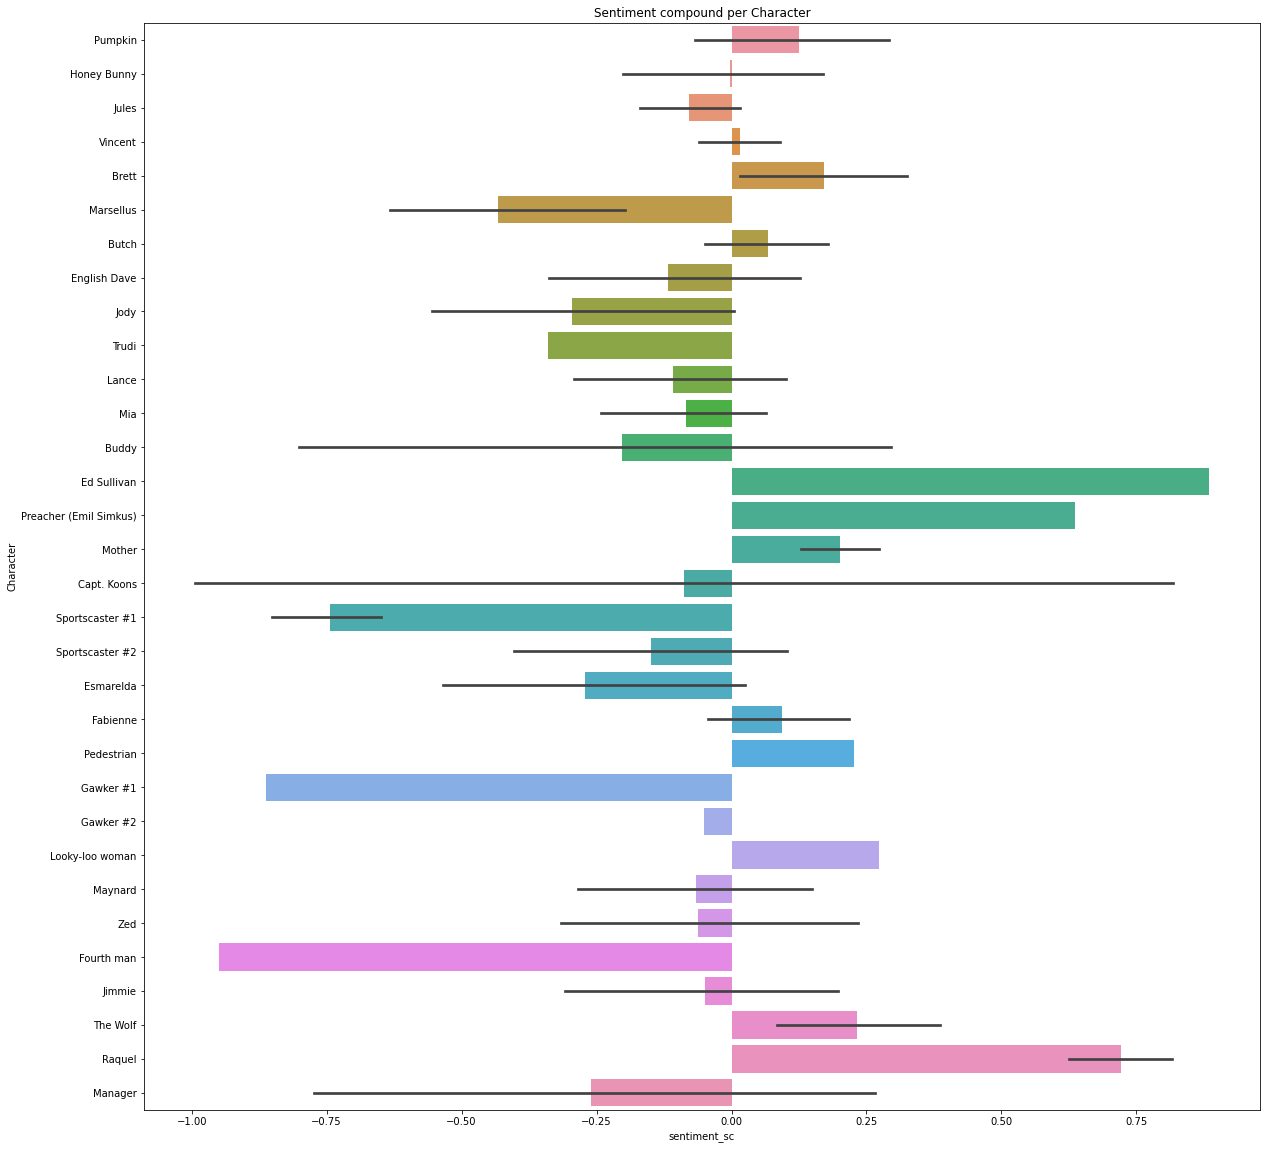

In [26]:
fig, ax = plt.subplots(figsize = (20, 20))
ax = sns.barplot(x="sentiment_sc", y="Character", data=pf)
ax.set_title("Sentiment compound per Character")
plt.savefig('char_sentiment.png', dpi=300)

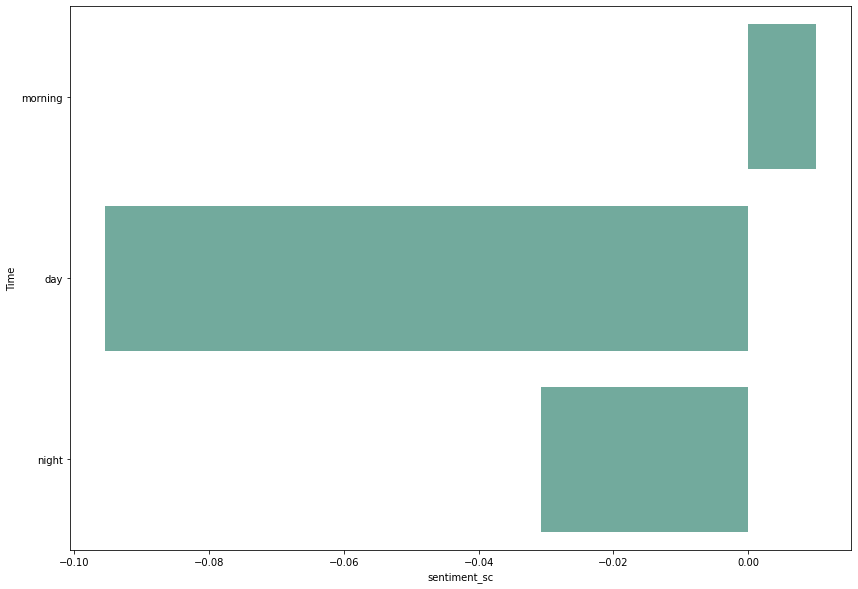

In [27]:
plt.figure(figsize=(14, 10))
sns.barplot(
    x="sentiment_sc", 
    y="Time", 
    data=pf,  
    ci=None, 
    color='#69b3a2'
)
ax.set_title("Sentiment compound per daytime")
plt.savefig('time_sentiment.png', dpi=300)

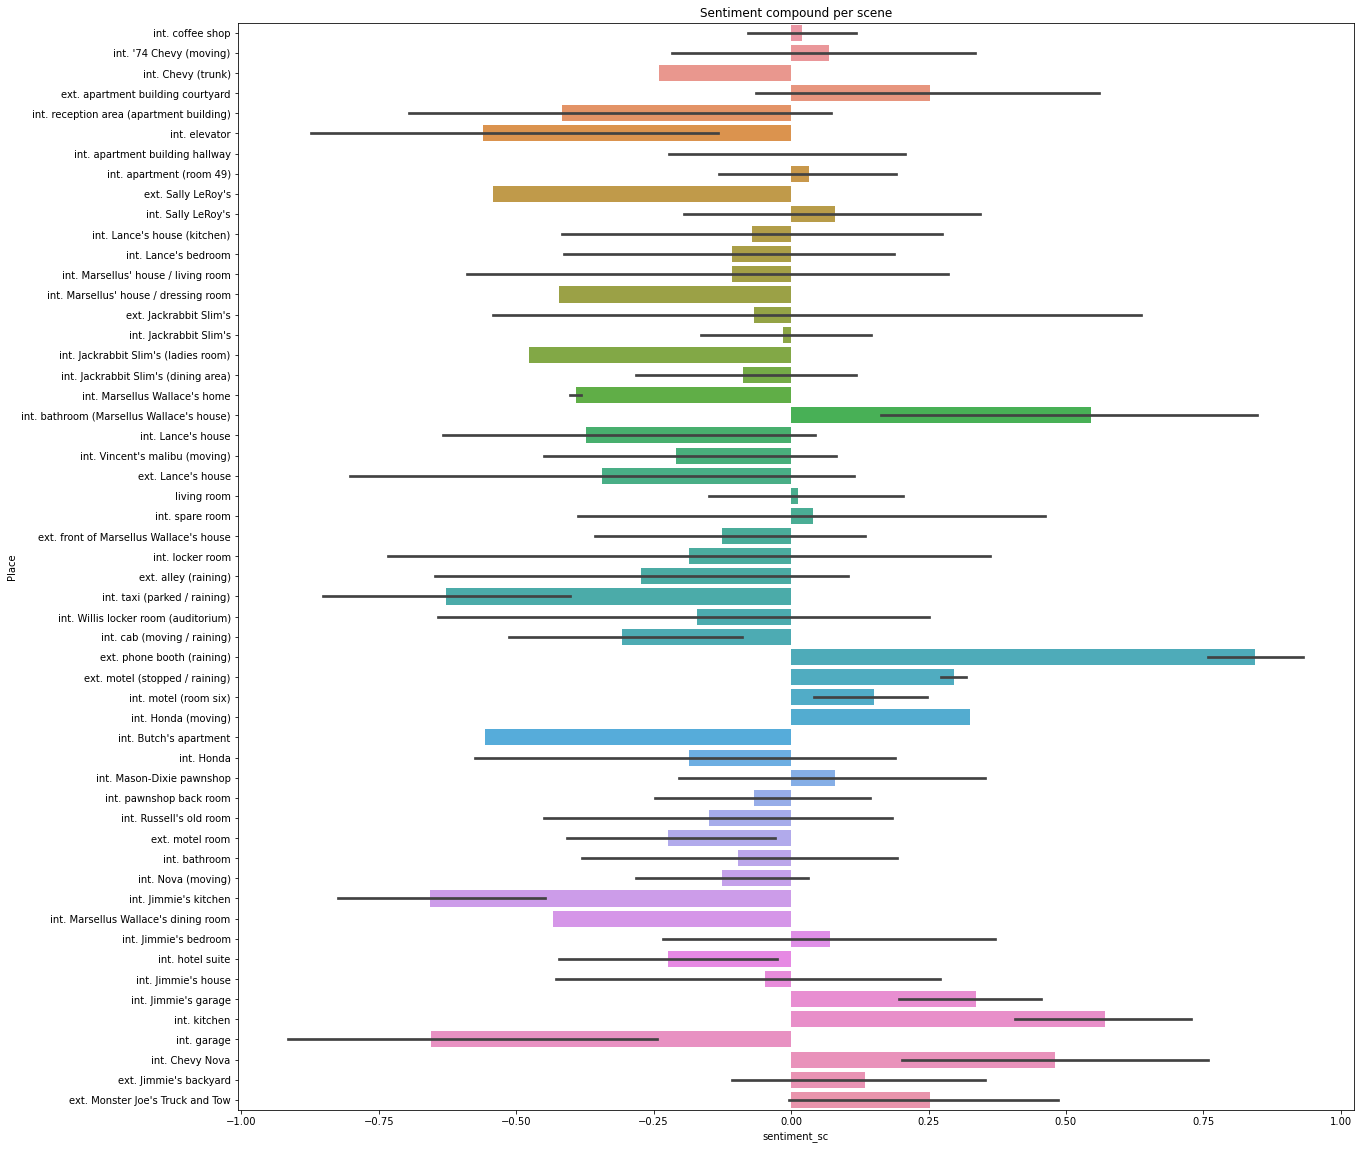

In [28]:
fig, ax = plt.subplots(figsize = (20, 20))
ax = sns.barplot(x="sentiment_sc", y="Place", data=pf)
ax.set_title("Sentiment compound per scene")
plt.savefig('place_sentiment.png', dpi=300)